<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Kopie_von_Categories_Eniac_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1CxCz2wZJW_iks67oT5GafrQWI8yAUBVW/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1nt92yDfR2GV2zsFWNnGm6lqyO3O_Zn_j/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products_qu.csv
url = "https://drive.google.com/file/d/1vgRjkSM5BuND4YGJTEgqmWempgyGtT99/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [4]:
b_df = brands.copy()
ol_df = orderlines.copy()
o_df = orders.copy()
p_df = products.copy()

In [5]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [6]:
# Change data type to datetime:

ol_df["date"] = pd.to_datetime(ol_df["date"])
o_df["created_date"] = pd.to_datetime(o_df["created_date"])

In [7]:
### Download csv file:

#Jupyter Lab:
#from IPython.display import FileLink
#df.to_csv("df.csv", index=False)
#files.download("df.csv")

#Google Colab:
#from google.colab import files
#df.to_csv("df.csv", index=False)
#files.download("df.csv")

### Changes

**products table:**
- Add discount column:

  Discounts are defined as the difference between orderlines.unit_price and products.price

  Code:
  p_ol_df = p_df.merge(ol_df, how="outer", left_on="sku", right_on="sku")
  p_ol_df["discount"] = p_ol_df["price"] - p_ol_df["unit_price"]
  p_df["discount"] = p_ol_df["discount"]

(Kathrin)

##Categories

In [8]:
p_category_df = p_df.copy()

In [9]:
p_category_df["category"] = ""

In [10]:
p_category_df.head()

,sku,name,desc,price,in_stock,type,discount,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,10.00,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,10.00,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,5.00,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,5.00,


In [11]:
from wordcloud import WordCloud

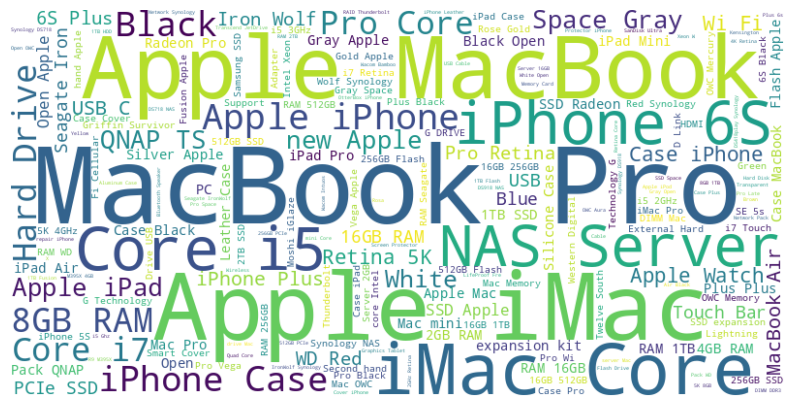

In [12]:

# Concatenate text data from the "name" and "desc" columns into a single string
text = ' '.join(p_category_df['name'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

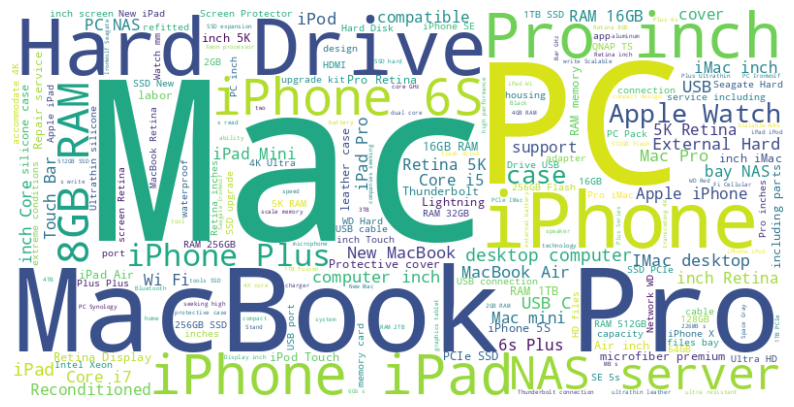

In [13]:
# Concatenate text data from the "name" and "desc" columns into a single string
text = ' '.join(p_category_df['desc'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already generated the word cloud as described in your code

# Access the word counts from the word cloud
word_counts_from_wordcloud = wordcloud.words_

# Convert word counts dictionary to a list of words
words_list = list(word_counts_from_wordcloud.keys())

# Display the list of words
print("List of words from the word cloud:")
print(words_list)

List of words from the word cloud:
['Mac', 'PC', 'MacBook Pro', 'Hard Drive', 'iPhone', 'Pro inch', 'iPhone iPad', 'iPhone 6S', 'NAS server', '8GB RAM', 'iPhone Plus', 'Apple Watch', 'case', 'desktop computer', 'iPad', 'New MacBook', 'IMac desktop', 'External Hard', 'computer inch', 'USB C', 'USB', 'MacBook Air', 'iPod', 'Mac Pro', 'Core i7', 'Mac mini', 'Wi Fi', 'bay NAS', 'Retina 5K', 'inch Core', 'PC NAS', '6s Plus', 'Touch Bar', 'iMac inch', 'Apple iPhone', 'iPad Pro', 'cover', 'inch Retina', 'Core i5', '5K Retina', 'support', 'Reconditioned', 'iPad Mini', 'compatible', 'RAM 16GB', 'microfiber premium', 'leather case', 'Retina Display', 'Thunderbolt', 'Air inch', 'iPod Touch', 'PCIe SSD', 'RAM 1TB', 'inch 5K', 'iPad Air', 'Pro Retina', 'labor', 'Lightning', 'iPhone 5S', 'RAM memory', 'including parts', 'inch iMac', 'Repair service', '16GB RAM', 'silicone case', 'Protective cover', 'service including', 'USB connection', 'Plus Plus', '16GB', 'inch screen', 'adapter', 'HDMI', 'Seagate

#Our Cathegories:

In [15]:
# Tokenize the words in the description column
p_category_df['tokens'] = p_category_df['desc'].str.lower().str.split() + p_category_df['name'].str.lower().str.split()

# Define categories based on specific words or patterns
categories = {
    "accessories": ["adonit", "stabilizer", "intuos", "bamboo", "backpack", "case", "cover", "retina", "protective cover", "silicone case", "leather case", "screen protector", "stand", "support", "sliding", "headset", "controller", "remote", "mouse", "speakers", "printer", "microphone", "cameras", "glasses", "speaker", "speakers.", "artpen", "pen", "pencil", "camera", "padlock", "trackpad", "headphones", "keyboard"],
    "storage": ["12tb", "bays", "seagate", "san", "nas", "synology", "pcie", "8gb", "ram", "16gb", "32gb", "64gb", "128gb", "256gb", "ssd", "512gb", "1tb", "2tb ram", "3tb", "4tb", "1tb pcie", "1tb fusion", "hard drive", "external hard drive", "drive", "nas server"],
    "apple products": ["xmac", "watch", "ipod", "pro inch", "pro inches plus", "plus series", "space gray", "black", "27-inch", "monitor", "7", "6s","6s plus", "se", "x", "new macbook", "macbook", "ipad mini", "ipad air", "ipad pro", "imac", "cinema"],
    "connectivity": ["thunderbolt", "charging", "powercube", "router", "satellite", "capsule", "dlink", "connection.", "av", "connector", "adapter", "wi-fi", "thunderbolt connection", "usb connection", "usb", "network", "ethernet", "bluetooth", "pcie imac", "adapter", "cable", "usb cable", "lightning cable", "hdmi cable", "charger"]
}

# Function to assign categories based on words
def assign_category(tokens):
    for token in tokens:
        for category, keywords in categories.items():
            if token in keywords:
                return category
    return 'other'

# Assign categories to each description
p_category_df['category'] = p_category_df['tokens'].apply(assign_category)

In [16]:
#Category Changes: All apple products All accessories Computer comp to other


In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
filtered_df = p_category_df[(p_category_df["category"] == "other") & (p_category_df["price"] <= 100) & (p_category_df["price"] >= 10)]
filtered_df.head(1000)


,sku,name,desc,price,in_stock,type,discount,category,tokens
46,MOB0010,Additional Battery Pack Mobee Magic Bar,Pack extra battery Mobee Magic Bar.,29.99,0,12355400,0.00,other,"[pack, extra, battery, mobee, magic, bar., additional, battery, pack, mobee, magic, bar]"
58,MOS0065,Moshi TeraGlove cleaner screens,Microfibre screen cleaner for Mac iPhone iPad and iPod.,20.00,0,12355400,5.01,other,"[microfibre, screen, cleaner, for, mac, iphone, ipad, and, ipod., moshi, teraglove, cleaner, screens]"
78,APP0370,Apple TV media player,Apple multimedia player.,79.00,0,4259,3.01,other,"[apple, multimedia, player., apple, tv, media, player]"
97,MAK0015,Stick Maclocks silver metal safely iPad,Security lock plate steel iPad.,49.99,0,12085400,3.01,other,"[security, lock, plate, steel, ipad., stick, maclocks, silver, metal, safely, ipad]"
125,APP0400,Apple MagSafe to MagSafe converter 2,MagSafe to MagSafe converter 2.,12.00,0,1325,2.01,other,"[magsafe, to, magsafe, converter, 2., apple, magsafe, to, magsafe, converter, 2]"
158,NTE0039,"NewerTech NuPower battery PowerBook G4 15 """,Battery replacement PowerBook G4 15 inches.,99.99,0,13005399,2.01,other,"[battery, replacement, powerbook, g4, 15, inches., newertech, nupower, battery, powerbook, g4, 15, ""]"
207,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for iPhone 4,49.99,0,"1,44E+11",-0.04,other,"[repair, service, including, parts, and, labor, for, iphone, 4, full, screen, repair, iphone, 4]"
208,REP0040,Home button repair iPhone 4,Repair service including parts and labor for iPhone 4,49.99,0,"1,44E+11",0.00,other,"[repair, service, including, parts, and, labor, for, iphone, 4, home, button, repair, iphone, 4]"
209,REP0041,battery repair iPhone 4,Repair service including parts and labor for iPhone 4,29.99,0,"1,44E+11",9.01,other,"[repair, service, including, parts, and, labor, for, iphone, 4, battery, repair, iphone, 4]"
214,REP0100,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",4.01,other,"[it, is, including, parts, and, labor.., color, change, to, white, apple, iphone, 4]"


In [19]:
p_category_df.groupby("category").agg({"sku":"count", "price":"sum"})

,sku,price
category,,
accessories,2528,223794.66
apple products,2613,3596942.95
connectivity,1714,468526.45
other,453,45561.44
storage,2684,2333298.41


In [20]:
category_summary1 = p_category_df.groupby("category").agg({"sku":"count", "price":"sum"})

# Calculate the total price across all categories
total_price = category_summary1["price"].sum()

# Calculate the percentage of price for each category
category_summary1["price_percentage"] = (category_summary1["price"] / total_price) * 100

In [21]:
## Get revenue: price * product quantity of sku
# Merge ol_df & p_category_df
ol_p_category_df = ol_df.merge(p_category_df, how="right", left_on="sku", right_on="sku")
ol_p_category_df_grouped = ol_p_category_df.groupby("sku").agg({"product_quantity":"sum", "price":"first", "category":"first"})


ol_p_category_df_grouped["revenue"] = ol_p_category_df_grouped["product_quantity"] * ol_p_category_df_grouped["price"]
ol_p_category_df_grouped.reset_index(inplace=True)


In [22]:
category_summary2 = ol_p_category_df_grouped.groupby("category").agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2["revenue_percentage"] = (category_summary2["revenue"] / total_price) * 100

In [23]:
category_summary2

,category,sku,revenue,revenue_percentage
0,accessories,2528,1044113.58,11.18
1,apple products,2613,2330064.24,24.94
2,connectivity,1714,1634651.33,17.50
3,other,453,309127.00,3.31
4,storage,2684,4024470.71,43.08


# Based on the category_summary2, make a pie chart of this 5 categories

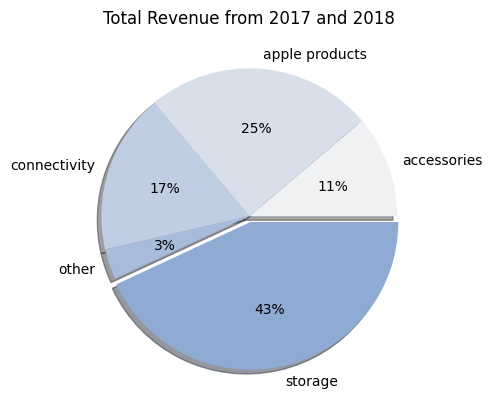

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.light_palette("#79C")[0:5]
explode = (0, 0, 0, 0, 0.04)
#create pie chart
plt.pie(x=category_summary2['revenue_percentage'], labels =category_summary2['category'], colors = colors, shadow=True, explode=explode, autopct='%.0f%%')
plt.title("Total Revenue from 2017 and 2018")
plt.show()

# Yearly Revenue of each category in 2017 and 2018

The datetime column is in the dataset order? or orderline?

In [25]:
ol_p_category_df.head() #date
ol_p_category_df.info() #date -- datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58125 entries, 0 to 58124
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  float64       
 1   id_order          53231 non-null  float64       
 2   product_id        53231 non-null  float64       
 3   product_quantity  53231 non-null  float64       
 4   sku               58125 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              58125 non-null  object        
 8   desc              58125 non-null  object        
 9   price             58125 non-null  float64       
 10  in_stock          58125 non-null  int64         
 11  type              58077 non-null  object        
 12  discount          54617 non-null  float64       
 13  category          58125 non-null  object        
 14  tokens            5812

In [26]:
category_summary2.head()  # --> ol_p_category_df_grouped

,category,sku,revenue,revenue_percentage
0,accessories,2528,1044113.58,11.18
1,apple products,2613,2330064.24,24.94
2,connectivity,1714,1634651.33,17.50
3,other,453,309127.00,3.31
4,storage,2684,4024470.71,43.08


In [45]:
ol_p_category_df_grouped.head() # --> ol_p_category_df

,sku,product_quantity,price,category,revenue
0,8MO0001-A,1.00,35.00,connectivity,35.00
1,8MO0003-A,1.00,35.00,connectivity,35.00
2,8MO0007,7.00,35.00,connectivity,245.00
3,8MO0008,11.00,35.00,connectivity,385.00
4,8MO0009,5.00,35.00,connectivity,175.00


In [27]:
ol_p_category_df.head()
list(ol_p_category_df.columns)
"""
--> ['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date',
 'name', 'desc', 'price', 'in_stock', 'type', 'discount', 'category', 'tokens']
 """
list(ol_p_category_df_grouped.columns)
# -->['sku', 'product_quantity', 'price', 'category', 'revenue']
list(category_summary2.columns)
# --> ['category', 'sku', 'revenue', 'revenue_percentage']

['category', 'sku', 'revenue', 'revenue_percentage']

Now we want to calculate the yearly revenue in 2017 and 2018, then we have to include the 'date' in the ol_p_category_df

In [28]:
# ol_p_category_df = ol_df.merge(p_category_df, how="right", left_on="sku", right_on="sku")
# ol_p_category_df_grouped = ol_p_category_df.groupby("sku").agg({"product_quantity":"sum", "price":"first", "category":"first"})
#ol_df.info()
#ol_p_category_df.info() # 'date' is already a datetime64
ol_p_category_df["year"] = ol_df.date.dt.year
ol_p_category_df_grouped_by_year = ol_p_category_df.groupby(["sku","year"]).agg({"product_quantity":"sum", "price":"first", "category":"first"}).reset_index()
ol_p_category_df_grouped_by_year.head()

,sku,year,product_quantity,price,category
0,8MO0001-A,2018.00,1.00,35.00,connectivity
1,8MO0007,2017.00,7.00,35.00,connectivity
2,8MO0008,2017.00,11.00,35.00,connectivity
3,8MO0009,2017.00,5.00,35.00,connectivity
4,8MO0010,2017.00,1.00,35.00,connectivity


In [29]:
ol_p_category_df_grouped_by_year["revenue"] = ol_p_category_df_grouped_by_year["product_quantity"] * ol_p_category_df_grouped_by_year["price"]
ol_p_category_df_grouped_by_year.reset_index(inplace=True)

Now category_summary2 will change to category_summary2_by_year and trying to make the same Pie Chart

In [30]:
category_summary2_by_year = ol_p_category_df_grouped_by_year.groupby(["year","category"]).agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2_by_year["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2_by_year["revenue_percentage"] = (category_summary2_by_year["revenue"] / total_price) * 100

In [31]:
category_summary2_by_year.tail()

,year,category,sku,revenue,revenue_percentage
5,2018.00,accessories,442,205972.36,2.38
6,2018.00,apple products,732,1041762.99,12.05
7,2018.00,connectivity,292,443187.03,5.13
8,2018.00,other,63,47552.10,0.55
9,2018.00,storage,641,1143137.75,13.22


In [32]:
category_summary2_2017 = category_summary2_by_year.loc[category_summary2_by_year.year == 2017]

In [33]:
category_summary2_2017

,year,category,sku,revenue,revenue_percentage
0,2017.00,accessories,1714,716067.54,8.28
1,2017.00,apple products,1492,1130189.77,13.07
2,2017.00,connectivity,1156,1042731.18,12.06
3,2017.00,other,339,192900.59,2.23
4,2017.00,storage,1825,2682790.49,31.03


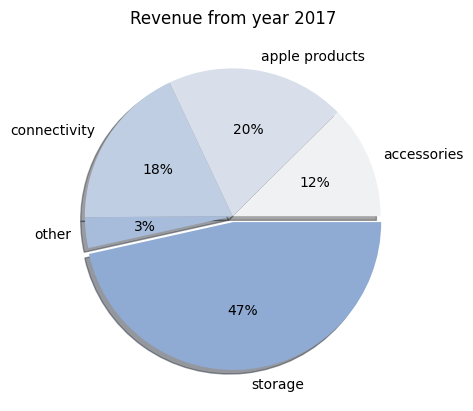

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
#define Seaborn color palette to use
colors = sns.light_palette("#79C")[0:5]
explode = (0, 0, 0, 0, 0.04)
#create pie chart
plt.pie(x=category_summary2_2017['revenue_percentage'], labels =category_summary2_2017['category'], colors = colors, shadow=True, explode=explode, autopct='%.0f%%')
plt.title("Revenue from year 2017")
plt.show()

# 2018 only three months data!!! Now to find out the maximal date and the minimum date

In [35]:
ol_p_category_df.head()
print(ol_p_category_df.date.max(),ol_p_category_df.date.min(), sep="\n")

2018-03-14 11:58:13
2017-01-01 01:46:16


Grap the date from the first three months and then compare with year and category

In [36]:
#ors_nov17 = ol_df.loc[ol_df['date'].dt.strftime('%Y-%m') == '2017-11'], %m-%d
# month only in January, Feburary and March
ol_p_category_df["month"] = ol_df.date.dt.month
ol_p_category_df.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'name', 'desc', 'price', 'in_stock', 'type', 'discount',
       'category', 'tokens', 'year', 'month'],
      dtype='object')

select only the first three months data ini each year

In [37]:
ol_p_category_df_janfebmar = ol_p_category_df.loc[ol_p_category_df["month"].isin([1,2,3])]
ol_p_category_df_janfebmar.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,category,tokens,year,month
0,1121326.00,300551.00,0.00,1.00,RAI0007,54.99,2017-01-02 13:34:30,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]",2017.00,1.00
1,1149253.00,310820.00,0.00,1.00,RAI0007,49.99,2017-01-17 09:37:43,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]",2017.00,1.00
2,1149773.00,311042.00,0.00,1.00,RAI0007,49.99,2017-01-17 15:55:39,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]",2017.00,1.00
3,1181573.00,324568.00,0.00,1.00,RAI0007,54.99,2017-02-15 13:36:16,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]",2017.00,1.00
4,1188189.00,327565.00,0.00,1.00,RAI0007,54.99,2017-02-22 13:01:25,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]",2017.00,1.00


Now groupby the year and category of the first three months data

In [38]:
ol_p_category_df_janfebmar_grouped_by_year = ol_p_category_df_janfebmar.groupby(["sku","year","month"]).agg({"product_quantity":"sum", "price":"first", "category":"first"}).reset_index()
ol_p_category_df_janfebmar_grouped_by_year.head()

,sku,year,month,product_quantity,price,category
0,8MO0001-A,2018.00,3.00,1.00,35.00,connectivity
1,ACM0009,2017.00,2.00,0.00,34.95,apple products
2,ADN0022,2017.00,3.00,9.00,119.00,accessories
3,ADN0023,2017.00,3.00,0.00,119.00,accessories
4,ADN0040-A,2018.00,1.00,0.00,34.99,apple products


Add the revenue column in the dataframe 'ol_p_category_df_janfebmar_grouped_by_year'

In [39]:
ol_p_category_df_janfebmar_grouped_by_year["revenue"] = ol_p_category_df_janfebmar_grouped_by_year["product_quantity"] * ol_p_category_df_janfebmar_grouped_by_year["price"]
ol_p_category_df_janfebmar_grouped_by_year.reset_index(inplace=True)

Now calculate the revenue percentage of these three months

In [40]:
category_summary2_janfebmar_by_year = ol_p_category_df_janfebmar_grouped_by_year.groupby(["year","month","category"]).agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2_janfebmar_by_year["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2_janfebmar_by_year["revenue_percentage"] = (category_summary2_janfebmar_by_year["revenue"] / total_price) * 100

In [41]:
category_summary2_janfebmar_by_year.tail()

,year,month,category,sku,revenue,revenue_percentage
25,2018.00,3.00,accessories,62,57575.84,1.48
26,2018.00,3.00,apple products,31,63271.71,1.63
27,2018.00,3.00,connectivity,33,14572.46,0.37
28,2018.00,3.00,other,10,8109.95,0.21
29,2018.00,3.00,storage,240,130325.83,3.35


In [42]:
category_summary2_janfebmar_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                30 non-null     float64
 1   month               30 non-null     float64
 2   category            30 non-null     object 
 3   sku                 30 non-null     int64  
 4   revenue             30 non-null     float64
 5   revenue_percentage  30 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ KB


Make a histgram of this three months in each year

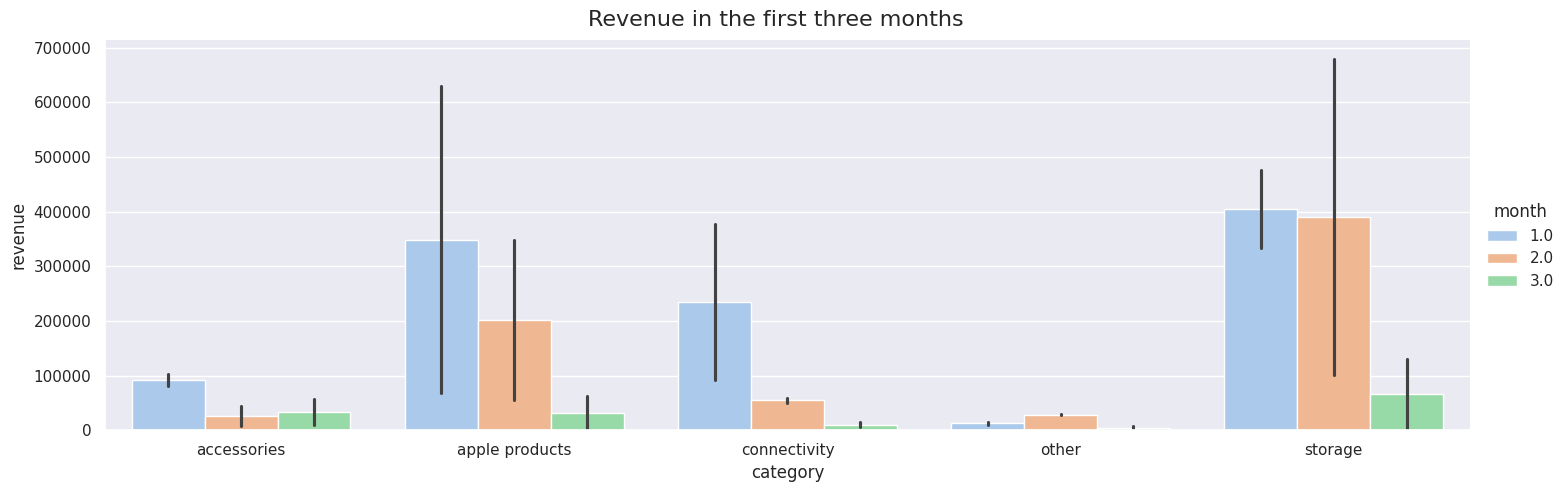

In [43]:
import seaborn as sns
sns.set(font_scale=1)
colors = sns.color_palette("pastel",n_colors=3)
catplot = sns.catplot(kind="bar",
            data=category_summary2_janfebmar_by_year,
            x="category",
            y="revenue", #row="month", hue="year"
            hue="month",
            palette=colors,
            aspect=3,
            sharey=False)
# Set the title
catplot.fig.suptitle("Revenue in the first three months", fontsize=16)

# Adjust the layout
catplot.fig.subplots_adjust(top=0.92)

# Actually the data from 2017 and 2018 should be parallel on the histogram, how to reach this?

In [ ]:
category_summary2_janfebmar_by_year

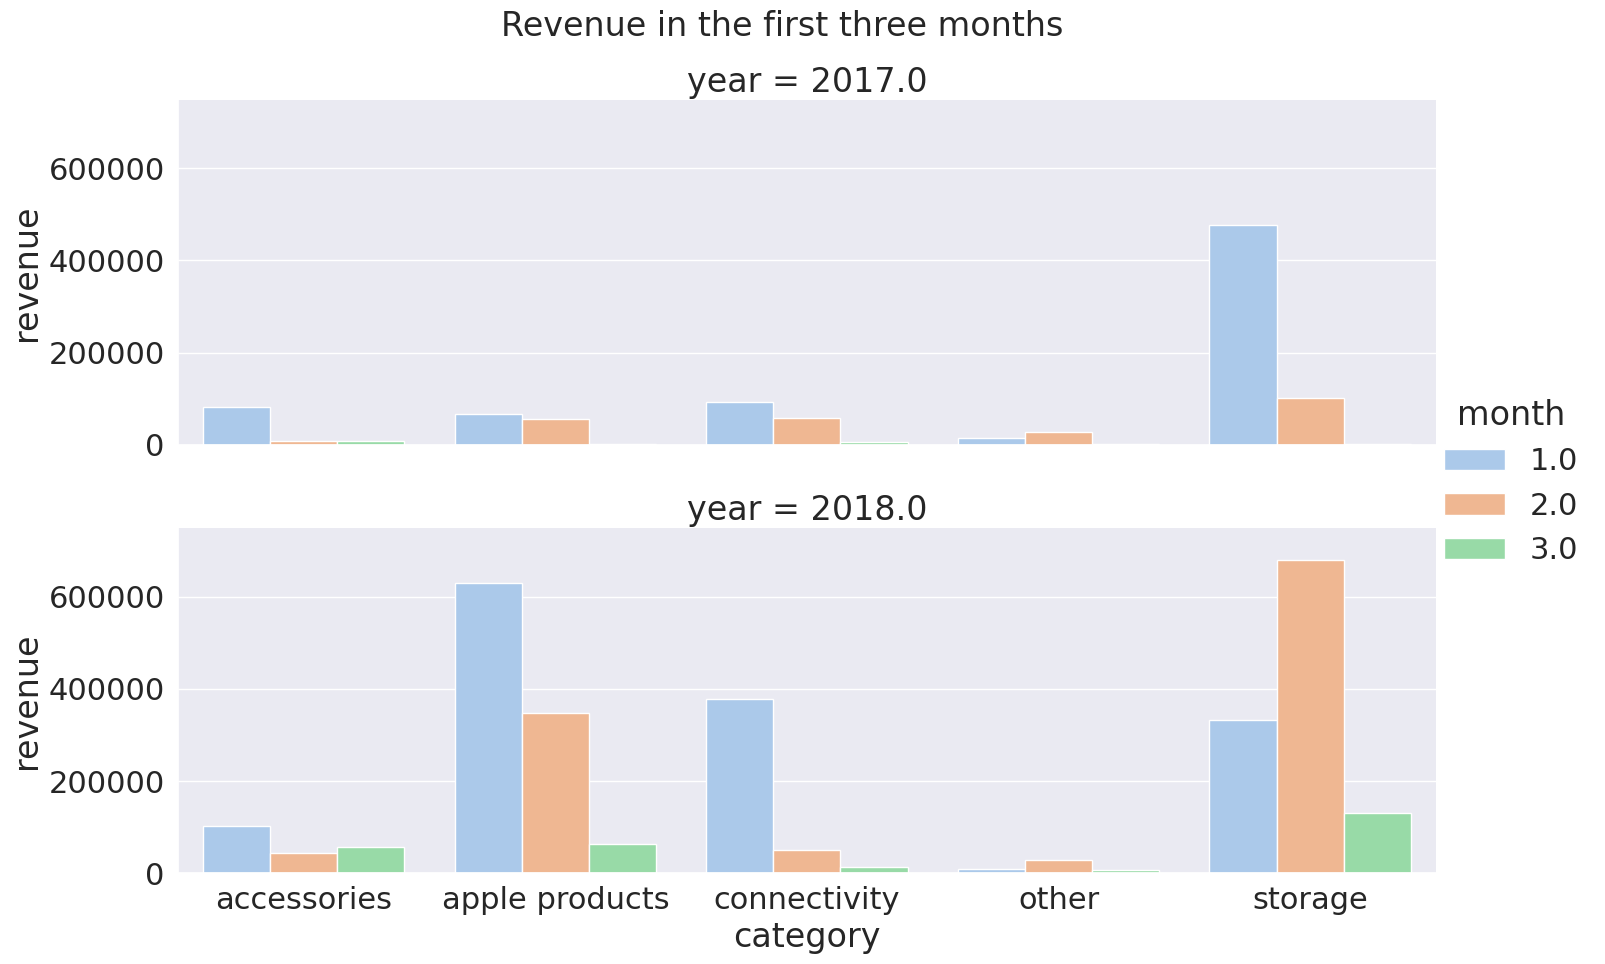

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font scale
sns.set(font_scale=2)
# Create the histogram plot
colors = sns.color_palette("pastel", n_colors=3)
catplot = sns.catplot(
    data=category_summary2_janfebmar_by_year,
    x="category",
    y="revenue",
    row="year",
    hue="month",
    palette=colors,
    kind="bar",
    aspect=3,
    sharey=True #because month=3 in 2017 unvisible
)

# Set the y-axis limits to include the smallest value
catplot.set(ylim=(0, category_summary2_janfebmar_by_year['revenue'].max()*1.1))

"""
# Set the y-axis limits for each row (year)
catplot.axes[0, 0].set_ylim(0, category_summary2_janfebmar_by_year[category_summary2_janfebmar_by_year['year'] == 2017]['revenue'].max())
catplot.axes[1, 0].set_ylim(0, category_summary2_janfebmar_by_year[category_summary2_janfebmar_by_year['year'] == 2018]['revenue'].max())
"""

# Set the title
catplot.fig.suptitle("Revenue in the first three months", fontsize=24)

# Adjust the layout
catplot.fig.subplots_adjust(top=0.89)

As the barplot shows that the revenue in the month=3 are so small that they are fast insivible in the plot, so try to set the y-axis as exonential scale, maybe it will look better.
Main part is the same code, only have to preset the exponential scale of y=revenue.

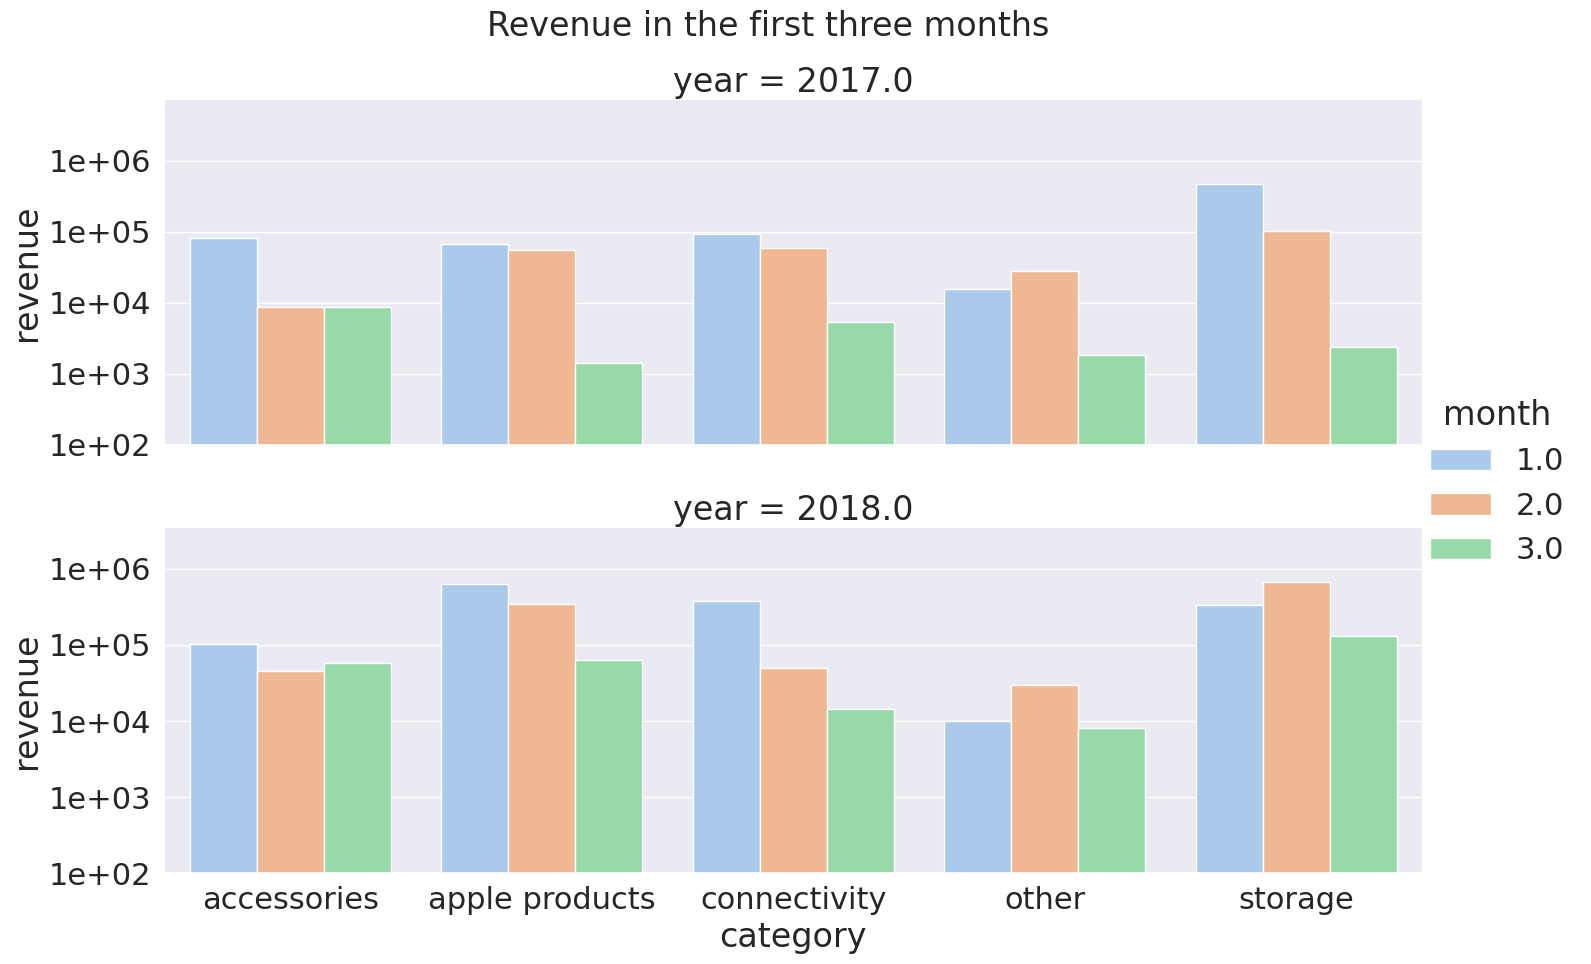

In [85]:
import matplotlib.ticker as ticker

# Set the font scale
sns.set(font_scale=2)

# Create the bar plot
colors = sns.color_palette("pastel", n_colors=3)
catplot = sns.catplot(
    data=category_summary2_janfebmar_by_year,
    x="category",
    y="revenue",
    row="year",
    hue="month",
    palette=colors,
    kind="bar",
    aspect=3,
    sharey=False
)

# Set the y-axis to use an exponential scale in 2017
ax7 = catplot.axes[0, 0]
ax7.set_yscale("symlog")
ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0e}"))

# Set the y-axis to use an exponential scale in 2018
ax8 = catplot.axes[1, 0]
ax8.set_yscale("symlog")
ax8.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0e}"))


# Set the y-axis limits for each row (year)
ax7.set_ylim(100, category_summary2_janfebmar_by_year[category_summary2_janfebmar_by_year['year'] == 2017]['revenue'].max()*15)
ax8.set_ylim(100, category_summary2_janfebmar_by_year[category_summary2_janfebmar_by_year['year'] == 2018]['revenue'].max()*5)
#catplot.axes[1, 0].set_ylim(0, category_summary2_janfebmar_by_year[category_summary2_janfebmar_by_year['year'] == 2018]['revenue'].max()*1.1)

# Set the title
catplot.fig.suptitle("Revenue in the first three months", fontsize=24)

# Adjust the layout
catplot.fig.subplots_adjust(top=0.89)

# Discount change of the two biggest category: Apple product and Storage with the time, is there any pattern about this discount? How is the Discount designed?
**Discount vs. product sold quantities in dependence of timeseries**

First have to filter the two categories from the whole dataset.

In [26]:
category_summary2 = ol_p_category_df_grouped.groupby("category").agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2["revenue_percentage"] = (category_summary2["revenue"] / total_price) * 100

In [22]:
category_summary1

,sku,price,price_percentage
category,,,
accessories,2528,223794.66,3.36
apple products,2613,3596942.95,53.94
connectivity,1714,468526.45,7.03
other,453,45561.44,0.68
storage,2684,2333298.41,34.99


In [34]:
p_category_df.head()

,sku,name,desc,price,in_stock,type,discount,category,tokens
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]"
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,10.00,connectivity,"[usb, ultrathin, keyboard, apple, mac, spanish., apple, mac, keyboard, keypad, spanish]"
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,10.00,accessories,"[mouse, apple, usb, cable., mighty, mouse, apple, mouse, for, mac]"
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,5.00,connectivity,"[iphone, dock, and, usb, cable, apple, ipod., apple, dock, to, usb, cable, iphone, and, ipod, white]"
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1,1364,5.00,storage,"[2gb, ram, mac, mini, and, imac, (2006/07), macbook, pro, (2006/07/08)., mac, memory, kingston, 2gb, 667mhz, ddr2, so-dimm]"


In [28]:
p_category_df.groupby("in_stock")["sku"].count()

in_stock
0    8000
1    1992
Name: sku, dtype: int64

In [29]:
p_category_df.shape

(9992, 9)

In [30]:
ol_df.shape

(53231, 7)

In [31]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [32]:
products_qu = p_category_df.drop(columns=["tokens"])

In [33]:
#Google Colab:
from google.colab import files
products_qu.to_csv("products_qu.csv", index=False)
files.download("products_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>